In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load Data Viz Pkgs
import seaborn as sns

In [4]:
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Value Counts
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [63]:
data = df.where((pd.notnull(df)),'')

In [9]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<Axes: xlabel='Category', ylabel='count'>

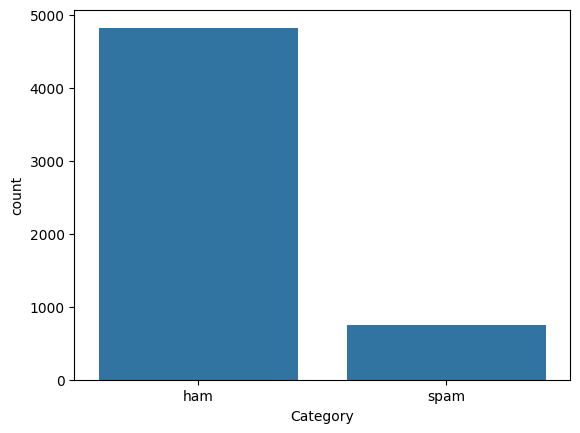

In [17]:
# Plot
sns.countplot(x='Category',data=df)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
data.shape

(5572, 2)

In [13]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

Allocating the dataset categories as '0' & '1' as assigned to spam and not spam(ham) messages

In [14]:
X = data['Message']
Y = data['Category']

In [18]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [19]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


0 -> spam messages

1 -> not spam messages

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

data set divided into 70% / 30% as train and test dataset

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(3900,)
(1672,)


this are the values of the divided dataset of X features

In [26]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(3900,)
(1672,)


same dataset divided values of Y features

In [32]:
features_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

Transforming test data into feature extraction of the text

difference (minimum) = 1

stop_words = the words that can be removed which doesn't impact the meaning of the sentences(and, the)

In [33]:
X_train_features = features_extraction.fit_transform(X_train)
X_test_features = features_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [36]:
pip install neattext

In [37]:
import neattext.functions as nfx

In [39]:
df['clean_message'] = df['Message'].apply(nfx.remove_stopwords)

In [40]:
df

,Category,Message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...","jurong point, crazy.. Available bugis n great ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun early hor... U c say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah think goes usf, lives"
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u. U £750 Pound prize...
5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...","Pity, * mood that. So...any suggestions?"
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like i'd interested buying ...


In [41]:
print(X_train)

1455    Can ü all decide faster cos my sis going home ...
3460    Not heard from U4 a while. Call me now am here...
2493    No drama Pls.i have had enough from you and fa...
3378    Yup. Wun believe wat? U really neva c e msg i ...
3826    Hi. I'm always online on yahoo and would like ...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 3900, dtype: object


This is the X_train dataset divided

In [43]:
print(X_train_features)

  (0, 3651)	0.3587221851838313
  (0, 3086)	0.2739938546908377
  (0, 2825)	0.27449571589502497
  (0, 5509)	0.40335109063478575
  (0, 1799)	0.3212783541487352
  (0, 2489)	0.5022955611445961
  (0, 1965)	0.45020567466160955
  (1, 4242)	0.25454751074340237
  (1, 4277)	0.33272056276910283
  (1, 3821)	0.2433861866561607
  (1, 6813)	0.2600994552195357
  (1, 6)	0.33272056276910283
  (1, 6147)	0.16521313463046028
  (1, 2058)	0.18864352312402063
  (1, 3671)	0.16295245094503386
  (1, 1153)	0.31698956000242107
  (1, 3875)	0.19423188001633226
  (1, 3534)	0.33272056276910283
  (1, 3451)	0.1449316171395763
  (1, 4271)	0.19008955732757765
  (1, 6331)	0.33272056276910283
  (1, 3003)	0.2841165834640824
  (2, 5099)	0.30299688346739717
  (2, 6545)	0.19459812997829923
  (2, 4225)	0.30299688346739717
  :	:
  (3897, 2908)	0.32603177409174644
  (3897, 4271)	0.2690692327260679
  (3898, 2081)	0.3654387356575668
  (3898, 3632)	0.3140198944936123
  (3898, 6590)	0.3055286729595858
  (3898, 3587)	0.3117604480135819


this is the accuracy values of the trained dataset

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [46]:
predict_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, predict_training_data)

In [47]:
print('accuracy is : ', accuracy_on_training_data)

accuracy is :  0.9661538461538461


this is the accuracy for the training data

In [48]:
predict_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, predict_test_data)

In [49]:
print('accuracy is : ', accuracy_on_test_data)

accuracy is :  0.9647129186602871


This is the accuracy of test data

In [56]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features = features_extraction.transform(input_mail)

prediction = model.predict(input_data_features)
print(prediction)


[1]


This is the final prediction line

0 -> is the spam mail


1 -> is the ham mail(not spam)

In [57]:
#adding the names to the values [0,1] as [spam, ham]
if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')
  print(prediction)


Ham mail


Here the condition says

if part :

if the value of [0] is == (equal to) 1
then the output should be ham mail i,e not spam

else part :

if the value of [0] is  (not equal to) 1
then the output should be spam mail.